In [21]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic') 
%matplotlib inline

In [22]:
# 서울시 유동인구 분석

# 1. openAPI 활용 및 json 데이터 읽기
## API : Application Programming Interface
## 서울시 데이터 포털에서 공공 API 활용하기
### 서울시 동별 인구통계
### http://data.seoul.go.kr/dataList/datasetView.do?infId=10043&srvType=S&serviceKind=2&currentPageNo=1

In [23]:
import requests

In [24]:
url = 'http://openapi.seoul.go.kr:8088'
api_key = 'sample' #개인인증키 발급받은 후, 입력
return_format = 'json'
service_id = 'octastatapi10043'
start_idx = 1
end_idx = 5

request_url = '/'.join([url, api_key, return_format, service_id, str(start_idx), str(end_idx)])
print(request_url)
# 'http://openapi.seoul.go.kr:8088/sample/json/octastatapi10043/1/500/' 


http://openapi.seoul.go.kr:8088/sample/json/octastatapi10043/1/5


In [25]:
response = requests.get(request_url)

In [26]:
response.text
#JSON 형태

'{"octastatapi10043":{"list_total_count":450,"RESULT":{"CODE":"INFO-000","MESSAGE":"정상 처리되었습니다"},"row":[{"GIGAN":"\ufeff2019.1/4","JACHIGU":"합계","DONG":"합계","SEDAE":"4,290,922","GYE_1":"10,054,979","NAMJA_1":"4,909,387","YEOJA_1":"5,145,592","GYE_2":"9,770,216","NAMJA_2":"4,772,134","YEOJA_2":"4,998,082","GYE_3":"284,763","NAMJA_3":"137,253","YEOJA_3":"147,510","SEDAEDANGINGU":"2.28","N_65SEISANGGORYEONGJA":"1,436,125"},{"GIGAN":"2019.1/4","JACHIGU":"종로구","DONG":"소계","SEDAE":"73,914","GYE_1":"162,913","NAMJA_1":"78,963","YEOJA_1":"83,950","GYE_2":"152,778","NAMJA_2":"74,536","YEOJA_2":"78,242","GYE_3":"10,135","NAMJA_3":"4,427","YEOJA_3":"5,708","SEDAEDANGINGU":"2.07","N_65SEISANGGORYEONGJA":"26,981"},{"GIGAN":"2019.1/4","JACHIGU":"종로구","DONG":"사직동","SEDAE":"4,552","GYE_1":"9,782","NAMJA_1":"4,432","YEOJA_1":"5,350","GYE_2":"9,504","NAMJA_2":"4,270","YEOJA_2":"5,234","GYE_3":"278","NAMJA_3":"162","YEOJA_3":"116","SEDAEDANGINGU":"2.09","N_65SEISANGGORYEONGJA":"1,770"},{"GIGAN":"2019.1/4

### json (Java Script Object Notation)

### 1) json 설명: https://ko.wikipedia.org/wiki/JSON
### 2) json online editor: https://jsoneditoronline.org/

In [27]:
sample = ' { \
    "이름": "김지아", \
    "나이": 25, \
    "성별": "여", \
    "주소": "서울특별시 양천구 목동",\
    "특기": ["농구", "도술"],\
    "가족관계": {"#": 2, "아버지": "홍판서", "어머니": "춘섬"},\
    "회사": "경기 수원시 팔달구 우만동"\
 }'

In [28]:
import json

In [29]:
jsonsample = json.loads(sample)

In [30]:
# json의 특정 항목에 접근
jsonsample['가족관계']['아버지']

'홍판서'

In [31]:
#API 결과를 json 포맷으로 변환
jsondata = response.json()

In [32]:
jsondata = jsondata['octastatapi10043']['row']
동별인구통계 = DataFrame(jsondata)
동별인구통계

,DONG,GIGAN,GYE_1,GYE_2,GYE_3,JACHIGU,NAMJA_1,NAMJA_2,NAMJA_3,N_65SEISANGGORYEONGJA,SEDAE,SEDAEDANGINGU,YEOJA_1,YEOJA_2,YEOJA_3
0,합계,﻿2019.1/4,"10,054,979","9,770,216","284,763",합계,"4,909,387","4,772,134","137,253","1,436,125","4,290,922",2.28,"5,145,592","4,998,082","147,510"
1,소계,2019.1/4,"162,913","152,778","10,135",종로구,"78,963","74,536","4,427","26,981","73,914",2.07,"83,950","78,242","5,708"
2,사직동,2019.1/4,"9,782","9,504",278,종로구,"4,432","4,270",162,"1,770","4,552",2.09,"5,350","5,234",116
3,삼청동,2019.1/4,"3,045","2,804",241,종로구,"1,445","1,322",123,636,"1,400",2,"1,600","1,482",118
4,부암동,2019.1/4,"10,523","10,111",412,종로구,"5,012","4,832",180,"1,752","4,295",2.35,"5,511","5,279",232


# 2. folium 을 활용한 지도 시각화

In [33]:
#folium 라이브러리 설치
# anaconda prompt에서 'pip install folium' 실행
import folium

In [34]:
map1 = folium.Map(location = [37.566535, 126.97796919999996], zoom_start = 15)
map1
# 서울시청을 지도의 중심으로, 지도를 그려줌. 
# zoom_start는 지도를 그릴 때 얼마나 zoom 해서 보여줄 지를 결정.  값이 클수록, zoom in

In [35]:
# Marker 추가하기 (지도에 지점 추가하기)
folium.Marker([37, 126], popup = '테스트지점').add_to(map1)

In [36]:
map1

# 서울시 유동인구 분석
### 목적 1. 서울시 유동인구 분석 추이 (유동인구 상승에 미치는 요인 분석)
### 목적 2. 서울시 보행자 환경이 열악한 지역 예측 

-----
## 1. 데이터 적재

In [37]:
수집년도 = [2012, 2013, 2014, 2015]

In [38]:
### 유동인구 기본 - 각 지점별 요일별/시간대별 유동인구 조사 내용 저장
유동인구기본 = {}
for year in 수집년도:
    fileName = 'data/서울시유동인구/0_유동인구_유동인구기본_' + str(year) + '.xlsx'
    유동인구기본[year] = pd.read_excel(fileName, skiprows = [0,1,3])

In [39]:
# 조사지점별 연령대별, 성별 유동인구
관찰조사 = {}
for year in 수집년도:
    fileName = 'data/서울시유동인구/1_유동인구_관찰조사_' + str(year) + '.xlsx'
    관찰조사[year] = pd.read_excel(fileName, skiprows = [0,1,3])

In [40]:
# 조사지점별 설문조사 결과
속성조사 = {}
for year in 수집년도:
    fileName = 'data/서울시유동인구/2_유동인구_속성조사_' + str(year) + '.xlsx'
    속성조사[year] = pd.read_excel(fileName, skiprows = [0,1,3])

In [41]:
속성조사 = {}
for year in 수집년도:
    fileName = 'data/서울시유동인구/2_유동인구_속성조사_' + str(year) + '.xlsx'
    속성조사[year] = pd.read_excel(fileName, skiprows = [0,1,3])

In [42]:
조사지점 = {}
for year in 수집년도:
    fileName = 'data/서울시유동인구/4_유동인구_조사지점정보_' + str(year) + '.xlsx'
    조사지점[year] = pd.read_excel(fileName, skiprows = [0,1,3])

In [43]:
보도형태 = {}
for year in 수집년도:
    fileName = 'data/서울시유동인구/4_유동인구_조사지점정보_' + str(year) + '.xlsx'
    보도형태[year] = pd.read_excel(fileName, skiprows = [0,1,3], sheet_name = 1)

In [44]:
구코드 = {}
for year in 수집년도:
    fileName = 'data/서울시유동인구/4_유동인구_조사지점정보_' + str(year) + '.xlsx'
    구코드[year] = pd.read_excel(fileName, skiprows = [0,1,3], sheet_name = 2)

In [45]:
동코드 = {}
for year in 수집년도:
    fileName = 'data/서울시유동인구/4_유동인구_조사지점정보_' + str(year) + '.xlsx'
    동코드[year] = pd.read_excel(fileName, skiprows = [0,1,3], sheet_name = 3)

In [46]:
집계구코드 = {}
for year in 수집년도:
    fileName = 'data/서울시유동인구/4_유동인구_조사지점정보_' + str(year) + '.xlsx'
    집계구코드[year] = pd.read_excel(fileName, skiprows = [0,1,3], sheet_name = 4)

---
### 2. 데이터 파악하기


#### 유동인구기본 데이터 파악

In [47]:
유동인구기본[2012].head()

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도
0,1,01-001,본조사,금,07시-08시,75,2012
1,2,01-001,본조사,금,08시-09시,39,2012
2,3,01-001,본조사,금,09시-10시,33,2012
3,4,01-001,본조사,금,10시-11시,33,2012
4,5,01-001,본조사,금,11시-12시,39,2012


In [48]:
# 기본 정보 확인
for year in 수집년도:
    print(year, '\n', 유동인구기본[year].info())
# 해마다 데이터량이 다름
# 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 7 columns):
ID유동인구조사    700000 non-null int64
조사지점코드      700000 non-null object
조사구분        700000 non-null object
조사요일        700000 non-null object
시간대         700000 non-null object
유동인구수       700000 non-null int64
년도          700000 non-null int64
dtypes: int64(3), object(4)
memory usage: 37.4+ MB
2012 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 7 columns):
ID유동인구조사    70000 non-null int64
조사지점코드      70000 non-null object
조사구분        70000 non-null object
조사요일        70000 non-null object
시간대         70000 non-null object
유동인구수       70000 non-null int64
년도          70000 non-null int64
dtypes: int64(3), object(4)
memory usage: 3.7+ MB
2013 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73302 entries, 0 to 73301
Data columns (total 7 columns):
ID유동인구조사    73302 non-null int64
조사지점코드      73302 non-null object
조사구분 

In [49]:
# 총 조사지점수도 년도별로 다름 
for year in 수집년도:
    print(len(유동인구기본[year].조사지점코드.unique()))


10000
1000
956
1300


In [52]:
# 조사구분도 년도별로 다름
for year in 수집년도:
    #print(유동인구기본[year].조사구분.unique())
    print('----', year, '----')
    print(유동인구기본[year].조사구분.value_counts())

---- 2012 ----
본조사    700000
Name: 조사구분, dtype: int64
---- 2013 ----
본조사    70000
Name: 조사구분, dtype: int64
---- 2014 ----
본조사       65532
계절요인조사     7770
Name: 조사구분, dtype: int64
---- 2015 ----
본조사       85890
계절요인조사    14000
지하철        2058
북촌         1008
Name: 조사구분, dtype: int64


In [53]:
# 조사구분도 년도별로 다름
for year in 수집년도:
    print('----', year, '----')
    print(유동인구기본[year].조사요일.unique())
    print(유동인구기본[year].조사요일.value_counts())

---- 2012 ----
['금' '수' '월' '토' '화']
토    140000
화    140000
금    140000
수    140000
월    140000
Name: 조사요일, dtype: int64
---- 2013 ----
['금' '수' '월' '토' '화']
수    14000
월    14000
토    14000
금    14000
화    14000
Name: 조사요일, dtype: int64
---- 2014 ----
['금' '수' '월' '토' '화' '목']
금    14670
수    14658
월    14658
토    14658
화    13104
목     1554
Name: 조사요일, dtype: int64
---- 2015 ----
['금' '토' '화' '목' '수' '월']
토    21000
금    20986
수    19978
월    19978
화    18046
목     2968
Name: 조사요일, dtype: int64


In [94]:
유동인구기본[2015][유동인구기본[2015].조사구분 == '본조사']

array(['본조사'], dtype=object)

In [95]:
# 본조사로만 다시 확인해 보자..
for year in 수집년도:
    print(len(유동인구기본[year][유동인구기본[year].조사구분 == '본조사'].조사지점코드.unique()))
    print(유동인구기본[year][유동인구기본[year].조사구분 == '본조사'].조사구분.unique())
    print(유동인구기본[year][유동인구기본[year].조사구분 == '본조사'].조사요일.unique())

10000
['본조사']
['금' '수' '월' '토' '화']
1000
['본조사']
['금' '수' '월' '토' '화']
937
['본조사']
['금' '수' '월' '토' '화']
1227
['본조사']
['금' '수' '월' '토' '화' '목']


In [ ]:
#  실습 - 아래 조건을 만족하는 데이터만 추출
# 조사구분: 본조사만 선택
# 조사요일 : 월,화,수,금,토만 선택
# 조사지점코드 : 모든 년도에 다 수집된 지점만 선택

In [54]:
# 1. 본조사만 선택
for year in 수집년도:
    유동인구기본[year] = 유동인구기본[year][유동인구기본[year].조사구분 == '본조사']

In [55]:
for year in 수집년도:
    print(유동인구기본[year].조사구분.unique())

['본조사']
['본조사']
['본조사']
['본조사']


In [56]:
# 2. 모든 년도에 다 수집된 조사지점코드만 선택
temp1 = set(유동인구기본[2012].조사지점코드.unique())
temp2 = set(유동인구기본[2013].조사지점코드.unique())
temp3 = set(유동인구기본[2014].조사지점코드.unique())
temp4 = set(유동인구기본[2015].조사지점코드.unique())


In [57]:
조사지점코드 = temp1.intersection(temp2).intersection(temp3).intersection(temp4)

In [62]:
len(조사지점코드) # -0-...

54

In [63]:
# 공통 지점만 추출
for year in 수집년도:
    유동인구기본[year] = 유동인구기본[year][유동인구기본[year].조사지점코드.isin(조사지점코드)]

In [64]:
for year in 수집년도:
    print(len(유동인구기본[year].조사지점코드.unique()))

54
54
54
54


In [65]:
# 정제된 데이터로 다시 한 번 확인
for year in 수집년도:
    print('---',year,'----')
    print('데이터개수: ', len(유동인구기본[year]))
    print('조사구분: ', 유동인구기본[year].조사구분.unique())
    print('조사요일: ', 유동인구기본[year].조사요일.unique())
    print('시간대: ', 유동인구기본[year].시간대.unique())

--- 2012 ----
데이터개수:  3780
조사구분:  ['본조사']
조사요일:  ['금' '수' '월' '토' '화']
시간대:  ['07시-08시' '08시-09시' '09시-10시' '10시-11시' '11시-12시' '12시-13시' '13시-14시'
 '14시-15시' '15시-16시' '16시-17시' '17시-18시' '18시-19시' '19시-20시' '20시-21시']
--- 2013 ----
데이터개수:  3780
조사구분:  ['본조사']
조사요일:  ['금' '수' '월' '토' '화']
시간대:  ['07시-08시' '08시-09시' '09시-10시' '10시-11시' '11시-12시' '12시-13시' '13시-14시'
 '14시-15시' '15시-16시' '16시-17시' '17시-18시' '18시-19시' '19시-20시' '20시-21시']
--- 2014 ----
데이터개수:  3780
조사구분:  ['본조사']
조사요일:  ['금' '수' '월' '토' '화']
시간대:  ['07시-08시' '08시-09시' '09시-10시' '10시-11시' '11시-12시' '12시-13시' '13시-14시'
 '14시-15시' '15시-16시' '16시-17시' '17시-18시' '18시-19시' '19시-20시' '20시-21시']
--- 2015 ----
데이터개수:  3780
조사구분:  ['본조사']
조사요일:  ['금' '수' '월' '토' '화']
시간대:  ['07시-08시' '08시-09시' '09시-10시' '10시-11시' '11시-12시' '12시-13시' '13시-14시'
 '14시-15시' '15시-16시' '16시-17시' '17시-18시' '18시-19시' '19시-20시' '20시-21시']


In [66]:
# 요일별 시간대별로 균등하게 누락 없이 집계되어 있는지 확인
# 2012, 2013, 2014, 2015 다 해보기..
유동인구기본[2012].pivot_table(index = '조사요일', columns = '시간대', aggfunc = 'count', values = 'ID유동인구조사')

시간대,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,14시-15시,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시
조사요일,,,,,,,,,,,,,,
금,54,54,54,54,54,54,54,54,54,54,54,54,54,54
수,54,54,54,54,54,54,54,54,54,54,54,54,54,54
월,54,54,54,54,54,54,54,54,54,54,54,54,54,54
토,54,54,54,54,54,54,54,54,54,54,54,54,54,54
화,54,54,54,54,54,54,54,54,54,54,54,54,54,54


In [79]:
# 실습. 지점별 연도별 유동인구 추이 보기
유동인구통계2012 = 유동인구기본[2012].pivot_table(index = '조사지점코드', aggfunc = 'sum', values = '유동인구수')
유동인구통계2013 = 유동인구기본[2013].pivot_table(index = '조사지점코드', aggfunc = 'sum', values = '유동인구수')
유동인구통계2014 = 유동인구기본[2014].pivot_table(index = '조사지점코드', aggfunc = 'sum', values = '유동인구수')
유동인구통계2015 = 유동인구기본[2015].pivot_table(index = '조사지점코드', aggfunc = 'sum', values = '유동인구수')

In [84]:
유동인구연도별통계 = pd.concat([유동인구통계2012, 유동인구통계2013, 유동인구통계2014, 유동인구통계2015], axis = 1)
유동인구연도별통계.columns = [2012, 2013, 2014, 2015]
유동인구연도별통계.head()

,2012,2013,2014,2015
조사지점코드,,,,
01-035,155400,145515,138672,127209.0
01-212,152655,218643,192465,193128.0
01-247,16770,38034,36876,36798.0
01-422,204594,244413,229845,236139.0
02-069,54474,35151,38622,28392.0


In [139]:
# 2015년 기준으로 2012년 대비 유동인구가 가장 많이 늘어난 지역 Top5와 가장 많이 줄어든 지역 Top5 지점 찾아서 지도에 표시해주기..
# pop message에는 지점이름과 연도별 유동인구 표기

유동인구연도별통계['차이'] = (유동인구연도별통계[2015]-유동인구연도별통계[2012])/유동인구연도별통계[2012]

In [140]:
# 1) 늘어난 지역 Top 5
top5 = 유동인구연도별통계.sort_values(by = '차이', ascending = False).head(5)

In [141]:
# 1) 늘어난 지역 Top 5
bottom5 = 유동인구연도별통계.sort_values(by = '차이').head(5)

In [142]:
# 각 지점 정보 가져오기
공통조사지점 = 조사지점[2012][조사지점[2012].조사지점코드.isin(유동인구연도별통계.index)]

In [143]:
# 필요한 컬럼만 선택
공통조사지점 = 공통조사지점[['조사지점코드', '조사지점명', 'X좌표','Y좌표']]

In [144]:
# 위치 정보 변환을 위한 라이브러리 설치
# pip install pyproj
#conda install pyproj
from pyproj import Proj, transform
# X좌표, Y좌표를 위도와 경도로 변환하는 함수 선언
def convert(x,y):
    inProj = Proj(init = 'epsg:5181')
    outProj = Proj(init = 'epsg:4326')
    x2,y2 = transform(inProj, outProj, x, y)
    return [y2, x2]

In [145]:
#측정위치50에 위도와 경도 정보를 추가
공통조사지점['위경도'] = 공통조사지점.apply(lambda 지점: convert(지점['X좌표'], 지점['Y좌표']), axis = 1)
공통조사지점.set_index('조사지점코드', inplace = True)


In [146]:
top5 = pd.concat([top5, 공통조사지점], axis = 1, join = 'inner')
bottom5 = pd.concat([bottom5, 공통조사지점], axis = 1, join = 'inner')

In [147]:
top5

,2012,2013,2014,2015,차이,조사지점명,X좌표,Y좌표,위경도
조사지점코드,,,,,,,,,
03-048,53571,66381,178821,199899.0,2.731478,한양식당,197581.91620,450448.62233,"[37.55355688408579, 126.97263442496785]"
22-019,16041,36162,40368,47067.0,1.934169,예술의 전당,201206.06553,442360.73302,"[37.48068710212047, 127.0136358382063]"
02-254,49281,123714,75273,128484.0,1.607171,백암왕순대(중국대사관 옆),198458.93229,451485.00244,"[37.56289652280269, 126.98255748277288]"
22-2072,10641,49860,46437,25794.0,1.424020,홍우빌딩,201992.54783,444108.18374,"[37.4964304087039, 127.02253257523537]"
02-1169,111405,250368,267708,245805.0,1.206409,명동예술극장,198644.90951,451581.98602,"[37.56377063359181, 126.98466227976517]"


In [148]:
#측정위치 50개를 지도에 표시
map1 = folium.Map(location = [37.566535, 126.97796919999996], zoom_start = 15)
for index, row in top5.iterrows():
    msg = '{0}: {1}'.format(row.조사지점명, row[2015])
    folium.Marker(row['위경도'], popup = msg, icon=folium.Icon(color='blue')).add_to(map1)
for index, row in bottom5.iterrows():
    msg = '{0}: {1}'.format(row.조사지점명, row[2015])
    folium.Marker(row['위경도'], popup = msg, icon=folium.Icon(color='red')).add_to(map1)

In [149]:
map1

# 조사지점 변경 사항 확인.. (포기..)

In [ ]:
# 조사지점 정보 변경있는지 확인
## 겹치는 게 별로 없음.......................................................................

In [209]:
for year in 수집년도:
    print('---', year, '---')
    print(조사지점[year][조사지점[year].조사구분 == '본조사'].info())

--- 2012 ---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9850 entries, 0 to 9867
Data columns (total 37 columns):
조사지점코드      9850 non-null object
조사지점명       9850 non-null object
구코드         9779 non-null float64
동코드         9779 non-null float64
주번지         9834 non-null object
부번지         9830 non-null object
도로명         8157 non-null object
보도너비        9850 non-null int64
차선수         9850 non-null int64
버스차로유무      9850 non-null object
중앙선여부       9850 non-null object
장애물유무       9850 non-null object
장애물종류       9850 non-null object
보행도로구분      9850 non-null object
점자블록유무      9850 non-null object
경사로유무       9850 non-null object
펜스유무        9850 non-null object
버스정류장유무     9850 non-null object
기타시설유무      0 non-null float64
지하철유무       9850 non-null object
횡단보도유무      9850 non-null object
보도형태        0 non-null float64
글로벌존지역명     0 non-null float64
주거지역명       0 non-null float64
지역중심명       0 non-null float64
지역중심상세명     0 non-null float64
지구중심명       0 non-null float64
지구중

In [206]:
조사지점[2012][조사지점[2012].구코드.isnull()]

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
11,01-012,뉴경신 숙녀화.,NaN,NaN,424,11,NaN,5,4,무,...,NaN,NaN,일반상업,NaN,NaN,201191.14551,452230.11390,1.102069e+12,2012,본조사
480,01-414,청계다방,NaN,NaN,436,5,NaN,6,1,무,...,NaN,NaN,일반상업,NaN,NaN,201026.29351,452215.35882,1.102069e+12,2012,본조사
510,02-001,아이앤유 태화빌딩,NaN,NaN,247,8,왕십리길,3,6,유,...,NaN,NaN,일반상업,NaN,NaN,201229.42149,451734.49400,1.102069e+12,2012,본조사
511,02-002,성동공업고등학교정문 우측 담벽,NaN,NaN,1-1,1,다산로 290,3,6,유,...,NaN,NaN,일반상업,NaN,NaN,201422.94083,452156.57649,1.102069e+12,2012,본조사
514,02-005,새말을금고회관,NaN,NaN,233,93,다산로,6,2,유,...,NaN,NaN,3종주거,NaN,NaN,201334.69250,451521.60240,1.102069e+12,2012,본조사
515,02-006,신흥빌딩,NaN,NaN,295,27,다산로,7,6,유,...,NaN,NaN,준주거,NaN,NaN,201195.38211,451174.10109,1.102070e+12,2012,본조사
516,02-007,신당동 삼성아파트 115동,NaN,NaN,843,0,금호동길,2,2,유,...,NaN,NaN,2종주거,NaN,NaN,201652.40886,451173.96349,1.102073e+12,2012,본조사
517,02-008,돈신댓잎갈비,NaN,NaN,294,64,금호동길,2,5,유,...,NaN,NaN,2종주거,NaN,NaN,201281.67500,451147.01769,1.102072e+12,2012,본조사
564,02-055,웰빙 마트 앞,NaN,NaN,33,22,다산로,5,6,유,...,NaN,NaN,준주거,NaN,NaN,201200.10534,451106.14762,1.102072e+12,2012,본조사
565,02-056,한국양봉농협,NaN,NaN,370,61,다산로,4,5,유,...,NaN,NaN,준주거,NaN,NaN,200997.84093,450753.97656,1.102070e+12,2012,본조사


In [205]:
조사지점[2012][조사지점[2012].조사구분 == '본조사'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9850 entries, 0 to 9867
Data columns (total 37 columns):
조사지점코드      9850 non-null object
조사지점명       9850 non-null object
구코드         9779 non-null float64
동코드         9779 non-null float64
주번지         9834 non-null object
부번지         9830 non-null object
도로명         8157 non-null object
보도너비        9850 non-null int64
차선수         9850 non-null int64
버스차로유무      9850 non-null object
중앙선여부       9850 non-null object
장애물유무       9850 non-null object
장애물종류       9850 non-null object
보행도로구분      9850 non-null object
점자블록유무      9850 non-null object
경사로유무       9850 non-null object
펜스유무        9850 non-null object
버스정류장유무     9850 non-null object
기타시설유무      0 non-null float64
지하철유무       9850 non-null object
횡단보도유무      9850 non-null object
보도형태        0 non-null float64
글로벌존지역명     0 non-null float64
주거지역명       0 non-null float64
지역중심명       0 non-null float64
지역중심상세명     0 non-null float64
지구중심명       0 non-null float64
지구중심상세내용    0 no

In [165]:
조사지점[2012][조사지점[2012].조사구분 == '본조사']

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
0,01-001,평창치안센터(파출소).,11010.0,1101056.0,229,4,NaN,3,5,유,...,NaN,NaN,2종주거,NaN,NaN,197049.74567,456193.22472,1.101056e+12,2012,본조사
1,01-002,구기 빌딩앞(카리스).,11010.0,1101056.0,110,12,NaN,4,6,유,...,NaN,NaN,2종주거,NaN,NaN,196222.46838,456497.42740,1.101056e+12,2012,본조사
2,01-003,신흥모피명품전문크리닝.,11010.0,1101055.0,127,11,NaN,3,8,유,...,NaN,NaN,2종주거,NaN,NaN,196423.97707,455511.52968,1.101055e+12,2012,본조사
3,01-004,우리농산물마트.,11010.0,1101055.0,94,2,NaN,3,7,유,...,NaN,NaN,2종주거,NaN,NaN,196315.80243,455621.38262,1.101055e+12,2012,본조사
4,01-005,세검정정류장,11010.0,1101055.0,92,0,세검정길,4,5,유,...,NaN,NaN,1종주거,NaN,NaN,196357.17125,455680.82580,1.101055e+12,2012,본조사
5,01-006,부흥문구사 입구,11010.0,1101056.0,330,1,세검정길,3,5,유,...,NaN,NaN,2종주거,NaN,NaN,197050.37285,456228.23301,1.101056e+12,2012,본조사
6,01-007,국민대학교 삼림과학대학 실습장,11010.0,1101056.0,0,0,세검정길,3,4,유,...,NaN,NaN,2종주거,NaN,NaN,197662.28452,456614.76839,1.101056e+12,2012,본조사
7,01-008,안성타워內 굿모닝파워공인중개사.,11010.0,1101056.0,72,72,NaN,4,4,유,...,NaN,NaN,2종주거,NaN,NaN,197904.19277,456718.34996,1.101056e+12,2012,본조사
8,01-009,복실 손뜨기.,11010.0,1101056.0,88,46,NaN,2,7,유,...,NaN,NaN,2종주거,NaN,NaN,196360.44943,456405.89296,1.101056e+12,2012,본조사
9,01-010,부암동 기아 자동차,11010.0,1101055.0,182,1,NaN,5,6,유,...,NaN,NaN,2종주거,NaN,NaN,196594.99831,455416.34658,1.101055e+12,2012,본조사


In [180]:
조사지점[2015][조사지점[2015].조사구분 == '본조사'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1426
Data columns (total 37 columns):
조사지점코드      1227 non-null object
조사지점명       1227 non-null object
구코드         1212 non-null float64
동코드         1212 non-null float64
주번지         1218 non-null object
부번지         1188 non-null object
도로명         1033 non-null object
보도너비        1221 non-null float64
차선수         1221 non-null float64
버스차로유무      1221 non-null object
중앙선여부       1221 non-null object
장애물유무       1221 non-null object
장애물종류       1221 non-null object
보행도로구분      1221 non-null object
점자블록유무      1221 non-null object
경사로유무       1221 non-null object
펜스유무        1221 non-null object
버스정류장유무     1221 non-null object
기타시설유무      0 non-null float64
지하철유무       1221 non-null object
횡단보도유무      1221 non-null object
보도형태        0 non-null float64
글로벌존지역명     0 non-null float64
주거지역명       0 non-null float64
지역중심명       0 non-null float64
지역중심상세명     0 non-null float64
지구중심명       0 non-null float64
지구중심상세내용    

In [183]:
조사지점[2015][(조사지점[2015].X좌표.isnull())]

,조사지점코드,조사지점명,구코드,동코드,주번지,부번지,도로명,보도너비,차선수,버스차로유무,...,지구중심상세내용,도심부도심지역명,용도구분,거주유형구분,입지유형명,X좌표,Y좌표,집계구코드,년도,조사구분
701,13-5001,엔제리너스,NaN,NaN,30,18,연세로 26-1,6.0,1.0,무,...,NaN,NaN,3종주거,NaN,NaN,NaN,NaN,NaN,2015,계절요인조사
702,13-5001,엔제리너스,NaN,NaN,30,18,연세로 26-1,6.0,1.0,무,...,NaN,NaN,3종주거,NaN,NaN,NaN,NaN,NaN,2015,본조사
703,13-5002,버거킹,NaN,NaN,30,18,연세로 38,6.0,2.0,무,...,NaN,NaN,2종주거,NaN,NaN,NaN,NaN,NaN,2015,계절요인조사
704,13-5002,버거킹,NaN,NaN,30,18,연세로 38,6.0,2.0,무,...,NaN,NaN,2종주거,NaN,NaN,NaN,NaN,NaN,2015,본조사
705,13-5003,사러가쇼핑센터 앞,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,본조사
706,13-5004,김상우추앤추한의원(2층),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,본조사
707,13-5005,비타민약국 앞,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,본조사
770,14-5001,홍대입구역 (4번출구앞),NaN,NaN,167-3,0,양화로 183(주변지역),3.0,8.0,유,...,NaN,NaN,3종주거,NaN,NaN,NaN,NaN,NaN,2015,계절요인조사
771,14-5001,홍대입구역 (4번출구앞),NaN,NaN,167-3,0,양화로 183(주변지역),3.0,8.0,유,...,NaN,NaN,3종주거,NaN,NaN,NaN,NaN,NaN,2015,본조사
1119,21-5001,이니스프리,NaN,NaN,1061,22,과천대로 945,6.0,9.0,유,...,NaN,NaN,3종주거,NaN,NaN,NaN,NaN,NaN,2015,계절요인조사


In [210]:
# X좌표, Y좌표가 같은데, 조사지점코드가 변경된 내역은 있는지 확인
temp1 = 조사지점[2012][조사지점[2012].조사구분 == '본조사'][['조사지점코드', '주번지','부번지', 'X좌표', 'Y좌표', '도로명']]
temp2 = 조사지점[2013][조사지점[2013].조사구분 == '본조사'][['조사지점코드', '주번지','부번지', 'X좌표', 'Y좌표', '도로명']]
temp3 = 조사지점[2014][조사지점[2014].조사구분 == '본조사'][['조사지점코드', '주번지','부번지', 'X좌표', 'Y좌표', '도로명']]
temp4 = 조사지점[2015][조사지점[2015].조사구분 == '본조사'][['조사지점코드', '주번지','부번지', 'X좌표', 'Y좌표', '도로명']]

In [211]:
temp5 = pd.merge(temp1, temp2, on = '도로명')
temp5 = pd.merge(temp5, temp3, on = '도로명')
temp5 = pd.merge(temp5, temp4, on = '도로명')

temp5.head()

,조사지점코드_x,주번지_x,부번지_x,X좌표_x,Y좌표_x,도로명,조사지점코드_y,주번지_y,부번지_y,X좌표_y,...,조사지점코드_x,주번지_x,부번지_x,X좌표_x,Y좌표_x,조사지점코드_y,주번지_y,부번지_y,X좌표_y,Y좌표_y
0,01-247,223,0,197583.32569,452665.74144,사직로 8길 39,01-247,223,0,197583.32569,...,01-247,223,NaN,197583.32569,452665.74144,01-247,223,0,197583.32569,452665.74144
1,01-422,38,1,198645.83082,452717.05178,인사동길 44,01-422,38,1,198645.83082,...,01-422,38,NaN,198645.83082,452717.05178,01-422,38,NaN,198645.83082,452717.05178
2,02-069,48,0,198929.19953,451744.01901,삼일대로 341,02-069,48,0,198929.19953,...,02-069,48,NaN,198929.19953,451744.01901,02-069,48,0,198929.19953,451744.01901
3,02-1169,50,5,198644.90951,451581.98602,명동7길8,02-1169,50,5,198644.90951,...,02-1169,50,5.0,198644.90951,451581.98602,02-1169,50,5,198644.90951,451581.98602
4,02-1170,50-5,0,198639.67575,451603.93141,명동길 38,02-1170,50,5,198639.67575,...,02-1170,50,5.0,198639.67575,451603.93141,02-1170,50,5,198639.67575,451603.93141


In [213]:
len(temp5)

38

In [216]:
temp5 = pd.merge(temp1, temp2, on = '조사지점코드')
temp5 = pd.merge(temp5, temp3, on = '조사지점코드')
temp5 = pd.merge(temp5, temp4, on = '조사지점코드')

temp5.head()

,조사지점코드,주번지_x,부번지_x,X좌표_x,Y좌표_x,도로명_x,주번지_y,부번지_y,X좌표_y,Y좌표_y,...,주번지_x,부번지_x,X좌표_x,Y좌표_x,도로명_x,주번지_y,부번지_y,X좌표_y,Y좌표_y,도로명_y
0,01-035,84,1,198688.03274,452134.47214,종로구 종로 74,84,1,198688.03274,452134.47214,...,84,1.0,198688.03274,452134.47214,종로 74,84,1,198688.03274,452134.47214,종로 74
1,01-212,7,0,200089.66004,453773.47339,대명길5,7,0,200089.66004,453773.47339,...,7,NaN,200089.66004,453773.47339,대명길 5,7,NaN,200089.66004,453773.47339,대명길 5
2,01-247,223,0,197583.32569,452665.74144,사직로 8길 39,223,0,197583.32569,452665.74144,...,223,NaN,197583.32569,452665.74144,사직로 8길 39,223,0,197583.32569,452665.74144,사직로 8길 39
3,01-422,38,1,198645.83082,452717.05178,인사동길 44,38,1,198645.83082,452717.05178,...,38,NaN,198645.83082,452717.05178,인사동길 44,38,NaN,198645.83082,452717.05178,인사동길 44
4,02-069,48,0,198929.19953,451744.01901,삼일대로 341,48,0,198929.19953,451744.01901,...,48,NaN,198929.19953,451744.01901,삼일대로 341,48,0,198929.19953,451744.01901,삼일대로 341


In [218]:
len(temp5)

64

# 보도형태 데이터 확인

In [67]:
#보도형태 데이터 확인 (년도별 변화 없음은 확인)
pd.concat([보도형태[2012], 보도형태[2013], 보도형태[2014], 보도형태[2015]], axis = 1)

,보도형태,보도형태설명,보도형태,보도형태설명,보도형태,보도형태설명,보도형태,보도형태설명
0,유형1,편도2차선이상도로_버스정류장있음,유형1,편도2차선이상도로_버스정류장있음,유형1,편도2차선이상도로_버스정류장있음,유형1,편도2차선이상도로_버스정류장있음
1,유형2,편도2차선이상도로_버스정류장없음,유형2,편도2차선이상도로_버스정류장없음,유형2,편도2차선이상도로_버스정류장없음,유형2,편도2차선이상도로_버스정류장없음
2,유형3,양방향통행도로_보행로,유형3,양방향통행도로_보행로,유형3,양방향통행도로_보행로,유형3,양방향통행도로_보행로
3,유형4,일방통행도로_양방향보행로,유형4,일방통행도로_양방향보행로,유형4,일방통행도로_양방향보행로,유형4,일방통행도로_양방향보행로
4,유형5,양방향통행도로_일방향보행로,유형5,양방향통행도로_일방향보행로,유형5,양방향통행도로_일방향보행로,유형5,양방향통행도로_일방향보행로
5,유형6,일방향통행도로_보행로,유형6,일방향통행도로_보행로,유형6,일방향통행도로_보행로,유형6,일방향통행도로_보행로
6,유형7,도로_보행로 구분없음,유형7,도로_보행로 구분없음,유형7,도로_보행로 구분없음,유형7,도로_보행로 구분없음
7,유형8,보행로전용_폭넓음,유형8,보행로전용_폭넓음,유형8,보행로전용_폭넓음,유형8,보행로전용_폭넓음
8,유형9,보행로전용_폭좁음,유형9,보행로전용_폭좁음,유형9,보행로전용_폭좁음,유형9,보행로전용_폭좁음
9,지하보도,NaN,지하보도,NaN,지하보도,NaN,지하보도,NaN


In [68]:
#구코드 데이터 확인
t_구코드 = pd.merge(구코드[2012], 구코드[2013], on = '구코드')
t_구코드 = pd.merge(t_구코드, 구코드[2014], on = '구코드')
t_구코드 = pd.merge(t_구코드, 구코드[2015], on = '구코드')

In [69]:
t_구코드 = t_구코드[['구명_x', '구명_y']]

In [70]:
for col in range(0,24):
    if len(set(t_구코드.T[col])) != 1:
        print ('something wrong: ', col)

In [71]:
#동코드 데이터 확인
t_동코드 = pd.merge(동코드[2012], 동코드[2013], on = '동코드')
t_동코드 = pd.merge(t_동코드, 동코드[2014], on = '동코드')
t_동코드 = pd.merge(t_동코드, 동코드[2015], on = '동코드')
t_동코드 = t_동코드[['동명_x', '동명_y']]

In [72]:
for col in range(0,len(t_동코드.T.columns)):
    if len(set(t_동코드.T[col])) != 1:
        print ('something wrong: ', col)

In [73]:
#집계구코드 데이터 확인

,집계구코드,구코드,동코드,구명,동명,연도,집계구명칭
0,1104070010005,1104,1104070,성동구,용답동,2013,영해약국
1,1104070010004,1104,1104070,성동구,용답동,2013,은광교회
2,1104070010007,1104,1104070,성동구,용답동,2013,하나빌라
3,1104070010001,1104,1104070,성동구,용답동,2013,나라글짓기학원
4,1104070010003,1104,1104070,성동구,용답동,2013,국민은행
5,1104067030002,1104,1104067,성동구,성수2가1동,2013,명인의원
6,1104067030001,1104,1104067,성동구,성수2가1동,2013,강변임광아파트
7,1104067030010,1104,1104067,성동구,성수2가1동,2013,정원미술학원
8,1104067040001,1104,1104067,성동구,성수2가1동,2013,대경빌딩
9,1104067040002,1104,1104067,성동구,성수2가1동,2013,경수중학교


In [311]:
t_집계구코드 = t_집계구코드[(t_집계구코드.구코드 >= 구코드[2015].구코드.min()) & (t_집계구코드.구코드 <= 구코드[2015].구코드.max())]

In [313]:
print(len(t_집계구코드), len(t_집계구코드.집계구코드.unique()))

16230 16230


In [327]:
t_집계구코드 = t_집계구코드[['집계구명칭_x', '집계구명칭_y']].reset_index().drop('index', axis = 1)

In [329]:
for col in range(0,len(t_집계구코드.T.columns)):
    if len(set(t_집계구코드.T[col])) != 1:
        print ('something wrong: ', col)

In [ ]:
# 속성조사 데이터 확인

In [226]:
len(속성조사[2012].조사지점코드.unique())

1000

In [229]:
속성조사[2012]

,ID속성조사,조사지점코드,조사일자,조사요일,남여구분,조사시간대,조사시간대_텍스트,연령대,거주지,통행주목적,방문횟수,동행자명,교통수단,보행환경,직업명,년도
0,1,12-467,NaN,NaN,남자,1,오전7시30분~11시,40~49세,은평구,"개인용무/집안일(병원,은행,관공서,종교활동,봉사활동 등)",주 3~5회,NaN,NaN,매우 불만족,자영업,2012
1,2,12-467,NaN,NaN,여자,1,오전7시30분~11시,30~39세,은평구,출근,매일,NaN,NaN,매우 불만족,전문/자유직,2012
2,3,12-467,NaN,NaN,여자,1,오전7시30분~11시,60세 이상,은평구,"그냥 걸으려고(운동,산책,기분전환 등)",주 3~5회,NaN,NaN,보통,자영업,2012
3,4,12-467,NaN,NaN,남자,1,오전7시30분~11시,50~59세,은평구,"개인용무/집안일(병원,은행,관공서,종교활동,봉사활동 등)",주 1~2회,NaN,NaN,약간 불만족,무직/기타,2012
4,5,12-467,NaN,NaN,여자,1,오전7시30분~11시,60세 이상,은평구,물건을 사려고,주 3~5회,NaN,NaN,약간 불만족,무직/기타,2012
5,6,12-467,NaN,NaN,남자,3,오후2시~5시,40~49세,은평구,"개인용무/집안일(병원,은행,관공서,종교활동,봉사활동 등)",매일,NaN,NaN,약간 불만족,일용/작업직,2012
6,7,12-467,NaN,NaN,여자,3,오후2시~5시,60세 이상,은평구,회사 또는 근무지(사업장 등)로 복귀,매일,NaN,NaN,보통,자영업,2012
7,8,12-467,NaN,NaN,여자,3,오후2시~5시,30~39세,은평구,물건을 사려고,매일,NaN,NaN,매우 불만족,(전업)주부,2012
8,9,12-467,NaN,NaN,여자,3,오후2시~5시,50~59세,은평구,물건을 사려고,주 3~5회,NaN,NaN,약간 불만족,(전업)주부,2012
9,10,12-467,NaN,NaN,남자,3,오후2시~5시,15~19세,은평구,귀가/퇴근/하교,매일,NaN,NaN,약간 만족,(대)학생,2012


## 보행만족도 예측하기
### 2012~2014년도 데이터로 학습해서 2015년도 데이터로 검증해보기

### 데이터 탐색

In [154]:
for year in 수집년도:
    print('---',year,'----')
    print('조사지점 개수', len(속성조사[year].조사지점코드.unique()))
    속성조사[year].info()
    
    
    ## 모든 년도에 20,000개의 데이터가 있음. 
    ## 1000개의 조사지점에서 데이터를 수집함.
    ## 

--- 2012 ----
조사지점 개수 1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
ID속성조사       20000 non-null int64
조사지점코드       20000 non-null object
조사일자         0 non-null float64
조사요일         0 non-null float64
남여구분         20000 non-null object
조사시간대        20000 non-null int64
조사시간대_텍스트    20000 non-null object
연령대          20000 non-null object
거주지          20000 non-null object
통행주목적        20000 non-null object
방문횟수         20000 non-null object
동행자명         0 non-null float64
교통수단         0 non-null float64
보행환경         20000 non-null object
직업명          20000 non-null object
년도           20000 non-null int64
dtypes: float64(4), int64(3), object(9)
memory usage: 2.4+ MB
--- 2013 ----
조사지점 개수 1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
ID속성조사       20000 non-null int64
조사지점코드       20000 non-null object
조사일자         0 non-null float64
조사요일         0 non-n

In [ ]:
for year in 수집년도:
    

In [155]:
# 각 지점별로 20명의 사용자에게 조사함.. 
# 실습 : 모든 년도에서 실제로 모든 지점별로 20명의 사용자에게 조사했는지 확인..
속성조사[2012].pivot_table(index = '조사지점코드', values = 'ID속성조사', aggfunc = 'count')

,ID속성조사
조사지점코드,
01-001,20
01-002,20
01-003,20
01-004,20
01-005,20
01-006,20
01-007,20
01-008,20
01-009,20


In [341]:
for year in 수집년도:
    temp = 속성조사[year].pivot_table(index = '조사지점코드', values = 'ID속성조사', aggfunc = 'count')
    print(len(temp[temp.ID속성조사 != 20]))

## 모든 년도 모든 지점에서 20명씩 조사한 데이터임..

0
0
0
0


In [362]:
Series([1,2,3]).isin([1,2,5])

0     True
1     True
2    False
dtype: bool

In [156]:
# 이건 일단 수업 시간에 하지 말자..
# 속성조사에 있는 지점에 대해서 유동인구 정보가 있는지 확인
for year in 수집년도:
    print('---',year,'-----')
    속성조사지점 = Series(속성조사[year].조사지점코드.unique())
    유동인구조사지점 = Series(유동인구기본[year].조사지점코드.unique())
    print(속성조사지점[~속성조사지점.isin(유동인구조사지점)])
    
#결론
#속성조사를 수행한 지점 중 2012, 2014년도에는 유동인구조사가 안된 조사지점도 있다.
# 2013, 2015년도는 모두 조사됨

--- 2012 -----
0      12-467
1      12-482
2      12-462
3      12-483
4      07-271
5      07-283
6      07-294
7      07-281
8      07-284
9      07-270
10     07-304
11     07-302
12     07-280
13     07-289
14     07-301
15     07-303
16     07-297
17     07-279
18     07-298
19     07-300
20     07-269
21     07-272
22     07-299
23     07-290
24     07-293
25     19-688
26     19-706
27     19-721
28     19-704
29     19-682
        ...  
970    24-955
971    24-933
972    01-034
973    01-056
974    02-073
975    01-042
976    03-170
977    03-153
978    08-329
979    20-737
980    20-751
981    20-748
982    20-754
983    21-758
984    22-845
985    14-538
986    14-519
987    17-640
988    17-636
989    12-459
990    11-433
991    21-788
992    23-866
993    22-803
994    01-064
995    19-705
996    02-081
997    02-123
998    02-110
999    02-077
Length: 997, dtype: object
--- 2013 -----
0       01-029
1       01-033
3       01-036
4       01-041
5       01-045
6       01-051

In [157]:
### 2012년도 데이터 만들기

# 1. 조사지점 점보 추출
# 조사지점[2012].info()
# 보행환경에 영향을 미칠 특성 선택 
# '조사지점코드'(다른 데이터와 합치기 위해 필요), 보도너비~ 횡단보도유무를 선택한 후 기타시설유무는 제거(모두 Null)
정제된조사지점 = 조사지점[2012].set_index('조사지점코드').loc[:, '보도너비':'횡단보도유무'].drop('기타시설유무', axis = 1).reset_index()
정제된조사지점.head(1)

,조사지점코드,보도너비,차선수,버스차로유무,중앙선여부,장애물유무,장애물종류,보행도로구분,점자블록유무,경사로유무,펜스유무,버스정류장유무,지하철유무,횡단보도유무
0,01-001,3,5,유,유,유,가로수 보호대,보도전용,무,무,무,유,유,유


In [158]:
# 각 컬럼별 값의 형태 확인
for col in 정제된조사지점.columns:
    print(col, 정제된조사지점[col].unique())

조사지점코드 ['01-001' '01-002' '01-003' ... '25-847' '25-848' '25-849']
보도너비 [ 3  4  2  5  6  7 12  9  8 10 15  1  0 14 18 13 16 22 19 11 20 42 24]
차선수 [ 5  6  8  7  4  2  1  3 10 12 14  9 11 18 13]
버스차로유무 ['유' '무']
중앙선여부 ['유' '무']
장애물유무 ['유' '무']
장애물종류 ['가로수 보호대' '가로수' '기둥(가로등 등)' '기타' '없음' '지하철 계단' '상가 고정 장애물 등' '불법주정차'
 '노점상/가판대' '쓰레기통' '신호제어기' '연석' '공중전화 부스' '소화전' '도로표지판' '우체통' '현관 계단'
 '배관연결']
보행도로구분 ['보도전용' '자동차겸용' '보도차도겸용']
점자블록유무 ['무' '유']
경사로유무 ['무' '유']
펜스유무 ['무' '유']
버스정류장유무 ['유' '무']
지하철유무 ['유' '무']
횡단보도유무 ['유' '무']


In [159]:
# '유','무'인 컬럼들은 '유' -->1, '무' --> 0으로 변환
# 1. '유,'무' 값을 갖는 컬럼 목록 만들기
유무컬럼 = []
for col in 정제된조사지점.columns:
    val = set(정제된조사지점[col])
    유무 = set(['유','무'])
    if len(val.difference(유무)) == 0:
        유무컬럼.append(col)

In [160]:
유무컬럼

['버스차로유무',
 '중앙선여부',
 '장애물유무',
 '점자블록유무',
 '경사로유무',
 '펜스유무',
 '버스정류장유무',
 '지하철유무',
 '횡단보도유무']

In [161]:
# 테스트코드
a = set([1,2,3])
b = set([2,1])
len(a.difference(b))

1

In [162]:
# '유','무'인 컬럼들은 '유' -->1, '무' --> 0으로 변환
for col in 유무컬럼:
    정제된조사지점[col] = 정제된조사지점[col].map({'유':1, '무':0})

In [163]:
정제된조사지점[정제된조사지점.장애물유무 == 0]

,조사지점코드,보도너비,차선수,버스차로유무,중앙선여부,장애물유무,장애물종류,보행도로구분,점자블록유무,경사로유무,펜스유무,버스정류장유무,지하철유무,횡단보도유무
13,01-014,4,6,1,1,0,없음,보도전용,1,0,0,1,1,0
116,01-2034,4,1,0,0,0,없음,보도전용,0,1,0,0,0,0
117,01-2035,5,1,0,0,0,없음,보도전용,0,1,0,0,0,0
144,01-2063,2,4,1,1,0,없음,보도전용,1,0,0,0,0,1
169,01-2090,1,2,0,0,0,없음,보도전용,0,1,0,1,1,1
174,01-2095,7,1,0,0,0,없음,보도전용,0,0,0,0,0,0
187,01-2107,1,2,1,1,0,없음,보도전용,0,0,0,1,1,1
200,01-2119,8,6,1,1,0,없음,보도전용,1,1,0,1,1,1
201,01-212,2,1,0,0,0,없음,보도차도겸용,0,0,0,1,1,1
207,01-2126,8,4,1,1,0,없음,보도전용,0,0,0,0,0,0


In [164]:
# 문자열 특성 인코딩
# 장애물종류, 보행도로구분 --> 원핫인코딩
# scikit-learn의 oneHotEncoder()보다 pandas의 get_dummies()가 더 편리함
정제된조사지점 = pd.get_dummies(정제된조사지점.set_index('조사지점코드'))

In [165]:
정제된조사지점.head(1)

,보도너비,차선수,버스차로유무,중앙선여부,장애물유무,점자블록유무,경사로유무,펜스유무,버스정류장유무,지하철유무,...,장애물종류_신호제어기,장애물종류_쓰레기통,장애물종류_없음,장애물종류_연석,장애물종류_우체통,장애물종류_지하철 계단,장애물종류_현관 계단,보행도로구분_보도전용,보행도로구분_보도차도겸용,보행도로구분_자동차겸용
조사지점코드,,,,,,,,,,,,,,,,,,,,,
01-001,3,5,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [166]:
속성조사[2012].head(1)

,ID속성조사,조사지점코드,조사일자,조사요일,남여구분,조사시간대,조사시간대_텍스트,연령대,거주지,통행주목적,방문횟수,동행자명,교통수단,보행환경,직업명,년도
0,1,12-467,NaN,NaN,남자,1,오전7시30분~11시,40~49세,은평구,"개인용무/집안일(병원,은행,관공서,종교활동,봉사활동 등)",주 3~5회,NaN,NaN,매우 불만족,자영업,2012


In [167]:
속성조사[2012].보행환경.unique()

array(['매우 불만족', '보통', '약간 불만족', '약간 만족', '매우 만족'], dtype=object)

In [168]:
# 정제된조사지점에 보행만족도 추가
# 1. 속성조사 정보 추가
정제된속성조사 = 속성조사[2012][['조사지점코드', '보행환경']]
정제된속성조사.보행환경 = 정제된속성조사.보행환경.map({'매우 불만족':1, '약간 불만족':2, '보통':3, '약간 만족':4, '매우 만족':5 })

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [169]:
보행환경점수 = 정제된속성조사.pivot_table(index = '조사지점코드', aggfunc = 'mean', values = '보행환경')

In [170]:
data = pd.concat([정제된조사지점, 보행환경점수], axis = 1, join = 'inner')

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 294 entries, 01-001 to 23-916
Data columns (total 33 columns):
보도너비                 294 non-null int64
차선수                  294 non-null int64
버스차로유무               294 non-null int64
중앙선여부                294 non-null int64
장애물유무                294 non-null int64
점자블록유무               294 non-null int64
경사로유무                294 non-null int64
펜스유무                 294 non-null int64
버스정류장유무              294 non-null int64
지하철유무                294 non-null int64
횡단보도유무               294 non-null int64
장애물종류_가로수            294 non-null uint8
장애물종류_가로수 보호대        294 non-null uint8
장애물종류_공중전화 부스        294 non-null uint8
장애물종류_기둥(가로등 등)      294 non-null uint8
장애물종류_기타             294 non-null uint8
장애물종류_노점상/가판대        294 non-null uint8
장애물종류_도로표지판          294 non-null uint8
장애물종류_배관연결           294 non-null uint8
장애물종류_불법주정차          294 non-null uint8
장애물종류_상가 고정 장애물 등    294 non-null uint8
장애물종류_소화전            294 non-null uint8
장애물종류_신호제어기 

In [175]:
# 지금까지 한 전처리 작업을 2013, 2014, 2015년도 데이터에도 동일하게 수행
# 이를 위해 함수로 제작함.
def 보행환경예측을위한전처리(조사지점, 속성조사):
    # 0. 조사지점코드가 중복되는 경우가 있음 (2014, 2015년도 조사지점 정보 중에....)
    정제된조사지점 = 조사지점[(조사지점.조사구분 == '본조사') & (~조사지점.보도너비.isnull())]
    # 1. 조사지점 데이터 중 필요한 특성만 추출
    정제된조사지점 = 정제된조사지점.set_index('조사지점코드').loc[:, '보도너비':'횡단보도유무'].drop('기타시설유무', axis = 1).reset_index()
    #print(정제된조사지점.head(1))
    # 2. 유','무'인 컬럼들은 '유' -->1, '무' --> 0으로 변환
    # 2-1. '유,'무' 값을 갖는 컬럼 목록 만들기
    유무컬럼 = []
    for col in 정제된조사지점.columns:
        val = set(정제된조사지점[col])
        유무 = set(['유','무'])
        if len(val.difference(유무)) == 0:
            유무컬럼.append(col)
    # 2-2. '유','무'인 컬럼들은 '유' -->1, '무' --> 0으로 변환
    for col in 유무컬럼:
        정제된조사지점[col] = 정제된조사지점[col].map({'유':1, '무':0})
    # 3. 문자열 특성 인코딩
    # 장애물종류, 보행도로구분 --> 원핫인코딩
    # scikit-learn의 oneHotEncoder()보다 pandas의 get_dummies()가 더 편리함
    정제된조사지점 = pd.get_dummies(정제된조사지점.set_index('조사지점코드'))
    # 4. 속성조사 정보 추가(보행환경점수)
    정제된속성조사 = 속성조사[['조사지점코드', '보행환경']]
    정제된속성조사.보행환경 = 정제된속성조사.보행환경.map({'매우 불만족':1, '약간 불만족':2, '보통':3, '약간 만족':4, '매우 만족':5, '매우불만족':1, '약간불만족':2, '약간만족':4, '매우만족':5 })
    # 5. 보행환경 평균 점수 계산
    보행환경점수 = 정제된속성조사.pivot_table(index = '조사지점코드', aggfunc = 'mean', values = '보행환경')
    # 6. 보행환경점수와 조사지점 정보 통합
    data = pd.concat([정제된조사지점, 보행환경점수], axis = 1, join = 'inner')
    return data
    #return 정제된조사지점, 보행환경점수

In [277]:
data2012 = 보행환경예측을위한전처리(조사지점[2012], 속성조사[2012])
data2013 = 보행환경예측을위한전처리(조사지점[2013], 속성조사[2013])

In [278]:
data2015 = 보행환경예측을위한전처리(조사지점[2015], 속성조사[2015])

In [279]:
print(len(data2012.columns))
print(len(data2013.columns))
print(len(data2015.columns))

# 컬럼명 intersection 및 통일화 필요

33
32
36


In [280]:
# data2013 컬럼을 기준으로, data2012, data2015에서 data2013에 없는 컬럼 삭제
print(data2012.columns) # 장애물종류_배관연결
print(data2013.columns)
print(data2015.columns) 
# '장애물종류_가로수 보호대','장애물종류_가로수보호대'  --> 두 개가 있네..
# '장애물종류_공중전화 부스', '장애물종류_공중전화부스' --> 중복
#'장애물종류_기둥(가로등 등)','장애물종류_기둥(가로등등)' --> 중복
# '장애물종류_상가 고정 장애물 등', '장애물종류_상가고정장애물등' --> 중복

Index(['보도너비', '차선수', '버스차로유무', '중앙선여부', '장애물유무', '점자블록유무', '경사로유무', '펜스유무',
       '버스정류장유무', '지하철유무', '횡단보도유무', '장애물종류_가로수', '장애물종류_가로수 보호대',
       '장애물종류_공중전화 부스', '장애물종류_기둥(가로등 등)', '장애물종류_기타', '장애물종류_노점상/가판대',
       '장애물종류_도로표지판', '장애물종류_배관연결', '장애물종류_불법주정차', '장애물종류_상가 고정 장애물 등',
       '장애물종류_소화전', '장애물종류_신호제어기', '장애물종류_쓰레기통', '장애물종류_없음', '장애물종류_연석',
       '장애물종류_우체통', '장애물종류_지하철 계단', '장애물종류_현관 계단', '보행도로구분_보도전용',
       '보행도로구분_보도차도겸용', '보행도로구분_자동차겸용', '보행환경'],
      dtype='object')
Index(['보도너비', '차선수', '버스차로유무', '중앙선여부', '장애물유무', '점자블록유무', '경사로유무', '펜스유무',
       '버스정류장유무', '지하철유무', '횡단보도유무', '장애물종류_가로수', '장애물종류_가로수보호대',
       '장애물종류_공중전화부스', '장애물종류_기둥(가로등등)', '장애물종류_기타', '장애물종류_노점상/가판대',
       '장애물종류_도로표지판', '장애물종류_불법주정차', '장애물종류_상가고정장애물등', '장애물종류_소화전',
       '장애물종류_신호제어기', '장애물종류_쓰레기통', '장애물종류_없음', '장애물종류_연석', '장애물종류_우체통',
       '장애물종류_지하철계단', '장애물종류_현관계단', '보행도로구분_보도전용', '보행도로구분_보도차도겸용',
       '보행도로구분_자동차겸용', '보행환경'],
      dtype='object')
Index(['보도너비', '차선수', '버스차

In [281]:
# 1) data2012에서 장애물종류_배관연결 컬럼 삭제
data2012.drop('장애물종류_배관연결', axis = 1, inplace = True)

In [282]:
## OR 연산 테스트
a = Series([0,0,1,1])
b = Series([0,1,0,1])
a | b

0    0
1    1
2    1
3    1
dtype: int64

In [283]:
# 2) data2015에서 중복된 컬럼을 하나로 통합
# 2-1) 가로수보호대 (둘 중 하나라도 1이면 1로 통합 --> OR 연산 수행)
#temp = (data2015['장애물종류_가로수 보호대'] - data2015['장애물종류_가로수보호대'])
#temp = temp[temp != 0].index
#data2015.loc[temp]
data2015['장애물종류_가로수 보호대'] = data2015['장애물종류_가로수 보호대'] | data2015['장애물종류_가로수보호대']
data2015.drop('장애물종류_가로수보호대', axis = 1, inplace = True)

In [284]:
# 2-2) 장애물종류_공중전화 부스', '장애물종류_공중전화부스'
data2015['장애물종류_공중전화 부스'] = data2015['장애물종류_공중전화 부스'] | data2015['장애물종류_공중전화부스']
data2015.drop('장애물종류_공중전화부스', axis = 1, inplace = True)

In [285]:
# 2-3)'장애물종류_기둥(가로등 등)','장애물종류_기둥(가로등등)' (둘 중 하나라도 1이면 1로 통합 --> OR 연산 수행)
data2015['장애물종류_기둥(가로등 등)'] = data2015['장애물종류_기둥(가로등 등)'] | data2015['장애물종류_기둥(가로등등)']
data2015.drop('장애물종류_기둥(가로등등)', axis = 1, inplace = True)
# 2-4) '장애물종류_상가 고정 장애물 등', '장애물종류_상가고정장애물등'(둘 중 하나라도 1이면 1로 통합 --> OR 연산 수행)
data2015['장애물종류_상가 고정 장애물 등'] = data2015['장애물종류_상가 고정 장애물 등'] | data2015['장애물종류_상가고정장애물등']
data2015.drop('장애물종류_상가고정장애물등', axis = 1, inplace = True)

In [286]:
# 3. 컬럼명 통일
data2012.columns = data2013.columns
data2015.columns = data2013.columns

In [287]:
### 분류 문제로 해보자.. 보행환경 점수가 2.0 미만 지역 예측하기.

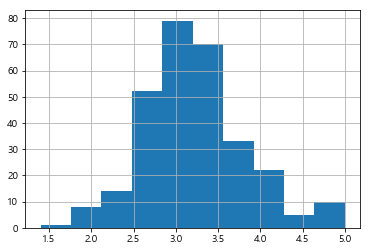

In [288]:
data2012.보행환경.hist()

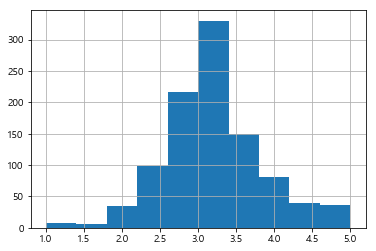

In [289]:
data2013.보행환경.hist()

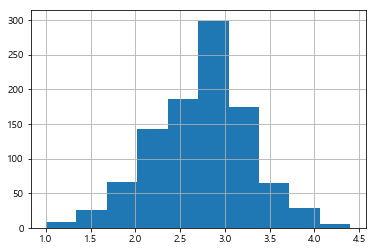

In [290]:
data2015.보행환경.hist()

In [293]:
# 4. data2012와 data2013을 학습용 데이터로 합치기
data = pd.concat([data2012, data2013, data2015], axis = 0)

In [294]:
print(len(data2012) + len(data2013) + len(data2015))

2293


In [296]:
data.보행환경 = data.보행환경.apply(lambda x: 1 if x < 2 else 0)

In [297]:
X_features = data.iloc[:, :-1]
y_label = data['보행환경']

In [298]:
y_label.value_counts()

0    2181
1     112
Name: 보행환경, dtype: int64

In [299]:
# 5. 학습용 데이터와 테스트용 데이터 확보
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label)

In [300]:
y_test.value_counts()

0    546
1     28
Name: 보행환경, dtype: int64

In [301]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [302]:
# 6. 학습 및 평가
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
get_clf_eval(y_test, rf_pred)

오차 행렬
[[535  11]
 [ 28   0]]
정확도: 0.9321, 정밀도: 0.0000, 재현율: 0.0000,    F1: 0.0000, AUC:0.4899


In [659]:
# GridSearchCV - 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 300, 500],
    'max_depth' : [3, 6, 9], 
    'min_samples_leaf' : [4, 8, 12],
    'min_samples_split' : [4, 8, 12], 
    'class_weight': [None, 'balanced']
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'class_weight': None, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
최고 예측 정확도: 0.8956


In [660]:
grid_cv.score(X_test, y_test)

0.706

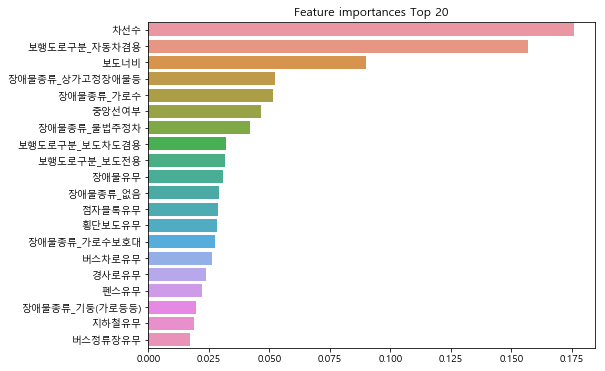

In [662]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = grid_cv.best_estimator_.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

In [303]:
# xgBoost 활용해보기
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=20)
evals = [(X_test, y_test)]  # early-stopping을 위한 테스트 데이터셋
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=400,eval_set=evals, eval_metric="logloss",  verbose=True)
 # 조기 중단(early-stopping)을 위한 인자
    # early_stopping_rounds : 반복횟수
    # eval_metric : 조기 중단을 위한 평가지표
    # eval_set: 조기 중단을 위한 테스트 데이터셋

[0]	validation_0-logloss:0.615882
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.552975
[2]	validation_0-logloss:0.500778
[3]	validation_0-logloss:0.456953
[4]	validation_0-logloss:0.419879
[5]	validation_0-logloss:0.388319
[6]	validation_0-logloss:0.361322
[7]	validation_0-logloss:0.337782
[8]	validation_0-logloss:0.318225
[9]	validation_0-logloss:0.301655
[10]	validation_0-logloss:0.286874
[11]	validation_0-logloss:0.274454
[12]	validation_0-logloss:0.263878
[13]	validation_0-logloss:0.254882
[14]	validation_0-logloss:0.246589
[15]	validation_0-logloss:0.239791
[16]	validation_0-logloss:0.233865
[17]	validation_0-logloss:0.229232
[18]	validation_0-logloss:0.22544
[19]	validation_0-logloss:0.22197
[20]	validation_0-logloss:0.219551
[21]	validation_0-logloss:0.216972
[22]	validation_0-logloss:0.21485
[23]	validation_0-logloss:0.212804
[24]	validation_0-logloss:0.211288
[25]	validation_0-logloss:0.209986
[26]	validation_0-logloss:0.209173

[230]	validation_0-logloss:0.27434
[231]	validation_0-logloss:0.274535
[232]	validation_0-logloss:0.274835
[233]	validation_0-logloss:0.275001
[234]	validation_0-logloss:0.275201
[235]	validation_0-logloss:0.275596
[236]	validation_0-logloss:0.275957
[237]	validation_0-logloss:0.27606
[238]	validation_0-logloss:0.276343
[239]	validation_0-logloss:0.276561
[240]	validation_0-logloss:0.276696
[241]	validation_0-logloss:0.277099
[242]	validation_0-logloss:0.277308
[243]	validation_0-logloss:0.277565
[244]	validation_0-logloss:0.277682
[245]	validation_0-logloss:0.277675
[246]	validation_0-logloss:0.278092
[247]	validation_0-logloss:0.278406
[248]	validation_0-logloss:0.27874
[249]	validation_0-logloss:0.278809
[250]	validation_0-logloss:0.278977
[251]	validation_0-logloss:0.279094
[252]	validation_0-logloss:0.279262
[253]	validation_0-logloss:0.279384
[254]	validation_0-logloss:0.279597
[255]	validation_0-logloss:0.279717
[256]	validation_0-logloss:0.279933
[257]	validation_0-logloss:0.28

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=20, min_child_weight=1, missing=None, n_estimators=1000,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [304]:
xgb_pred = xgb_wrapper.predict(X_test)
get_clf_eval(y_test, xgb_pred)

오차 행렬
[[546   0]
 [ 28   0]]
정확도: 0.9512, 정밀도: 0.0000, 재현율: 0.0000,    F1: 0.0000, AUC:0.5000


In [305]:
# 오버 샘플링 적용
from imblearn.over_sampling import SMOTE
# SMOTE - Synthetic Minority Over-sampling Technique
# 설치 : conda install -c conda-forge imbalanced-learn

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)

In [308]:
Series(y_train_over).value_counts()

1    1635
0    1635
dtype: int64

In [309]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_over , y_train_over)
rf_pred = rf_clf.predict(X_test)
get_clf_eval(y_test, rf_pred)

오차 행렬
[[533  13]
 [ 28   0]]
정확도: 0.9286, 정밀도: 0.0000, 재현율: 0.0000,    F1: 0.0000, AUC:0.4881


In [310]:
X_train_over = DataFrame(X_train_over, columns = X_test.columns)

In [315]:
# xgBoost 활용해보기
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=20)
evals = [(X_test, y_test)]  # early-stopping을 위한 테스트 데이터셋
xgb_wrapper.fit(X_train_over , y_train_over, verbose=True)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=20, min_child_weight=1, missing=None, n_estimators=1000,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [316]:
xgb_pred = xgb_wrapper.predict(X_test)
get_clf_eval(y_test, xgb_pred)

오차 행렬
[[527  19]
 [ 26   2]]
정확도: 0.9216, 정밀도: 0.0952, 재현율: 0.0714,    F1: 0.0816, AUC:0.5183


In [314]:
print('### 로지스틱 회귀 예측 성능 ###')
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train_over, y_train_over)
lr_pred = lr_clf.predict(X_test)
# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[305 241]
 [ 16  12]]
정확도: 0.5523, 정밀도: 0.0474, 재현율: 0.4286,    F1: 0.0854, AUC:0.4936


In [319]:
# 상관관계 조사
data_corr = data.corr()

In [320]:
data_corr['보행환경'].sort_values(ascending=False)

보행환경              1.000000
보도너비              0.073448
펜스유무              0.044486
버스차로유무            0.038791
장애물종류_기둥(가로등등)    0.032008
장애물종류_쓰레기통        0.031808
지하철유무             0.028835
장애물종류_공중전화부스      0.017798
횡단보도유무            0.012583
차선수               0.011674
장애물종류_상가고정장애물등    0.010041
장애물종류_신호제어기       0.009520
보행도로구분_보도전용       0.008822
경사로유무             0.007254
장애물유무             0.000093
장애물종류_가로수         0.000019
장애물종류_연석         -0.000547
장애물종류_없음         -0.002480
보행도로구분_자동차겸용     -0.004239
장애물종류_소화전        -0.006696
중앙선여부            -0.006856
보행도로구분_보도차도겸용    -0.006931
버스정류장유무          -0.008049
장애물종류_현관계단       -0.008202
장애물종류_기타         -0.008750
장애물종류_우체통        -0.009473
장애물종류_가로수보호대     -0.011710
장애물종류_불법주정차      -0.014275
장애물종류_도로표지판      -0.020157
장애물종류_지하철계단      -0.021257
장애물종류_노점상/가판대    -0.026444
점자블록유무           -0.030309
Name: 보행환경, dtype: float64

In [325]:
# 유동인구 결합해볼까.. --> 3개년도 데이터 다 합쳐도 100개가 안됨.................
data2012

,보도너비,차선수,버스차로유무,중앙선여부,장애물유무,점자블록유무,경사로유무,펜스유무,버스정류장유무,지하철유무,...,장애물종류_쓰레기통,장애물종류_없음,장애물종류_연석,장애물종류_우체통,장애물종류_지하철계단,장애물종류_현관계단,보행도로구분_보도전용,보행도로구분_보도차도겸용,보행도로구분_자동차겸용,보행환경
조사지점코드,,,,,,,,,,,,,,,,,,,,,
01-001,3,5,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,3.70
01-002,4,6,1,1,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2.65
01-003,3,8,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,3.15
01-004,3,7,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,3.60
01-005,4,5,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,3.65
01-006,3,5,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,1,0,0,3.40
01-007,3,4,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,1,0,0,3.65
01-008,4,4,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,4.70
01-009,2,7,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,4.05


In [335]:
전지점유동인구통계2012= 유동인구기본[2012][유동인구기본[2012].조사구분 == '본조사'].pivot_table(index = '조사지점코드', aggfunc = 'mean', values = '유동인구수')
전지점유동인구통계2013= 유동인구기본[2013][유동인구기본[2013].조사구분 == '본조사'].pivot_table(index = '조사지점코드', aggfunc = 'mean', values = '유동인구수')
전지점유동인구통계2015= 유동인구기본[2015][유동인구기본[2015].조사구분 == '본조사'].pivot_table(index = '조사지점코드', aggfunc = 'mean', values = '유동인구수')

In [336]:
pd.concat([data2012, 전지점유동인구통계2012], axis = 1, join = 'inner')

,보도너비,차선수,버스차로유무,중앙선여부,장애물유무,점자블록유무,경사로유무,펜스유무,버스정류장유무,지하철유무,...,장애물종류_없음,장애물종류_연석,장애물종류_우체통,장애물종류_지하철계단,장애물종류_현관계단,보행도로구분_보도전용,보행도로구분_보도차도겸용,보행도로구분_자동차겸용,보행환경,유동인구수
조사지점코드,,,,,,,,,,,,,,,,,,,,,
01-035,7,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.50,2220.000000
02-069,5,8,1,1,1,1,0,1,1,1,...,0,0,0,0,0,1,0,0,3.45,778.200000
02-074,4,6,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,2.70,2009.142857


In [337]:
pd.concat([data2013, 전지점유동인구통계2013], axis = 1, join = 'inner')

,보도너비,차선수,버스차로유무,중앙선여부,장애물유무,점자블록유무,경사로유무,펜스유무,버스정류장유무,지하철유무,...,장애물종류_없음,장애물종류_연석,장애물종류_우체통,장애물종류_지하철계단,장애물종류_현관계단,보행도로구분_보도전용,보행도로구분_보도차도겸용,보행도로구분_자동차겸용,보행환경,유동인구수
조사지점코드,,,,,,,,,,,,,,,,,,,,,
01-035,7.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2.70,2078.785714
01-212,2.0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,2.25,3123.471429
01-247,4.0,3,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,3.45,543.342857
01-422,5.0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,3.70,3491.614286
02-069,5.0,8,0,1,1,1,0,1,1,0,...,0,0,0,0,0,1,0,0,2.70,502.157143
02-074,4.0,6,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,3.65,2424.428571
02-1169,7.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2.25,3576.685714
02-1170,7.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.50,4217.614286
02-251,10.0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,3.00,4987.628571


In [338]:
pd.concat([data2015, 전지점유동인구통계2015], axis = 1, join = 'inner')

,보도너비,차선수,버스차로유무,중앙선여부,장애물유무,점자블록유무,경사로유무,펜스유무,버스정류장유무,지하철유무,...,장애물종류_없음,장애물종류_연석,장애물종류_우체통,장애물종류_지하철계단,장애물종류_현관계단,보행도로구분_보도전용,보행도로구분_보도차도겸용,보행도로구분_자동차겸용,보행환경,유동인구수
조사지점코드,,,,,,,,,,,,,,,,,,,,,
01-035,7.0,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2.55,1817.271429
01-212,2.0,1.0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,2.70,2758.971429
01-422,5.0,1.0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,2.80,3373.414286
02-074,4.0,6.0,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,1,2.00,1834.542857
02-251,10.0,1.0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,2.55,6741.128571
02-260,2.0,1.0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1.70,1810.328571
03-048,8.0,10.0,1,1,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,2.85,2855.700000
04-2026,9.0,6.0,0,1,1,0,1,1,1,1,...,0,1,0,0,0,1,0,0,1.90,980.528571
05-229,6.0,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3.35,1231.628571


In [ ]:
## 2014 데이터는 수집된 데이터가 너무 달라서 일단 보류..

array(['본조사'], dtype=object)

In [21]:
측정위치50 = 측정위치[['조사지점명', 'X좌표', 'Y좌표']].iloc[:50]
측정위치50
# 50개의 측정 위치에 대해 필요한 정보만 저장

,조사지점명,X좌표,Y좌표
0,신흥모피명품전문크리닝.,196423.97707,455511.52968
1,GS25,196315.80243,455621.38262
2,세검정정류장,196357.17125,455680.82580
3,안성타워內 굿모닝파워공인중개사.,197904.19277,456718.34996
4,복실 손뜨기.,196360.44943,456405.89296
5,24시 동대문 설렁탕.,200966.43423,452483.73642
6,서울전문학교.,201686.66781,452747.41594
7,서울 종묘농약,200231.75517,452355.91115
8,서울 종묘농약,200231.75517,452355.91115
9,삼성카드빌딩,199935.57893,452934.78947


,조사지점명,X좌표,Y좌표,위경도
0,신흥모피명품전문크리닝.,196423.97707,455511.52968,"[37.59916962231494, 126.95950527754184]"
1,GS25,196315.80243,455621.38262,"[37.600158960377534, 126.95827976042075]"
2,세검정정류장,196357.17125,455680.82580,"[37.60069470246644, 126.95874792945385]"


조사지점명                               신흥모피명품전문크리닝.
X좌표                                       196424
Y좌표                                       455512
위경도      [37.59916962231494, 126.95950527754184]
Name: 0, dtype: object
조사지점명                                        GS25
X좌표                                        196316
Y좌표                                        455621
위경도      [37.600158960377534, 126.95827976042075]
Name: 1, dtype: object
조사지점명                                     세검정정류장
X좌표                                       196357
Y좌표                                       455681
위경도      [37.60069470246644, 126.95874792945385]
Name: 2, dtype: object
조사지점명                         안성타워內 굿모닝파워공인중개사.
X좌표                                      197904
Y좌표                                      456718
위경도      [37.6100475136769, 126.97626371692706]
Name: 3, dtype: object
조사지점명                                   복실 손뜨기.
X좌표                                      196360
Y좌표                         

In [26]:
map1

# 3. 서울시 유동인구 분석

## 데이터 적재

In [2]:
유동인구 = pd.read_excel('data/project data/기본 데이터/0_유동인구_유동인구기본_2015.xlsx', 
                      skiprows = [0,1,3])

In [4]:
data = pd.read_excel('data/project data/기본 데이터/4_유동인구_조사지점정보_2015.xlsx', 
                     sheetname = None, skiprows = [0,1,3])

In [8]:
data.keys()

odict_keys(['유동인구_조사지점정보_2015', 'FTPTH_STLE_CN', 'GU_CD', 'DONG_CD', 'SM_GU_CD'])

In [10]:
조사지점 = data.get('유동인구_조사지점정보_2015')
구코드 = data.get('GU_CD')
동코드 = data.get('DONG_CD')
집계구코드 = data.get('SM_GU_CD')

In [14]:
유동인구.head(1)

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도
0,1,30-001,지하철,금,07시-08시,129.0,2015


In [35]:
집계구코드.head(1)

,집계구코드,구코드,동코드,구명,동명,연도,집계구명칭
0,1104070010005,1104,1104070,성동구,용답동,2013,영해약국


In [28]:
유동인구 = pd.merge(유동인구, 조사지점[['조사지점코드', '조사지점명', '구코드', '동코드', 'X좌표', 'Y좌표', '집계구코드']])

In [33]:
유동인구 = pd.merge(유동인구, 구코드[['구코드', '구명']])

In [34]:
유동인구 = pd.merge(유동인구, 동코드[['동코드', '동명']])

## 미션 1. 유동인구를 요일과 시간대 별로 분석하여, 유동인구가 가장 많은 상위 10개의 요일과 시간대를 출력. (e.g., 금요일 18시-19시가 유동인구가 가장 많음.)


In [36]:
유동인구.pivot_table(index = ['조사요일', '시간대'], values = '유동인구수', aggfunc = 'sum') \
                    .sort_values(by = '유동인구수', ascending = False).head(10)

,,유동인구수
조사요일,시간대,
금,18시-19시,1834989.0
토,18시-19시,1765764.0
금,19시-20시,1724322.0
수,18시-19시,1718088.0
토,17시-18시,1658499.0
월,18시-19시,1650957.0
토,19시-20시,1604469.0
월,19시-20시,1564488.0
토,16시-17시,1554849.0


## 미션 2	. 서울시 각 구별 전체 유동인구 분석

In [37]:
유동인구.head(1)

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,X좌표,Y좌표,집계구코드,구명,동명
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동


In [39]:
구별유동인구 = 유동인구.pivot_table(index = '구명', values = '유동인구수', aggfunc = 'sum')

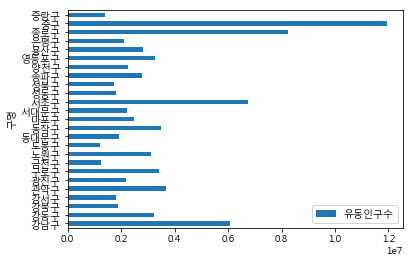

In [40]:
구별유동인구.plot(kind = 'barh')

## 미션 3. 서울시 각 구별로 출퇴근 시간의 유동인구 분석 (출퇴근 시간은 6시-10시, 18시-21시로 가정함)


In [41]:
유동인구.head(1)

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,X좌표,Y좌표,집계구코드,구명,동명
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동


In [43]:
구별시간대별유동인구 = 유동인구.pivot_table(index = ['구명', '시간대'], values = '유동인구수', aggfunc = 'sum')

In [65]:
출퇴근시간대 = list(np.unique(유동인구['시간대'])[0:3]) + list(np.unique(유동인구['시간대'])[-3:])

In [74]:
출퇴근시간대구별유동인구 = 구별시간대별유동인구[구별시간대별유동인구.index.get_level_values('시간대').isin(출퇴근시간대)]

In [84]:
출퇴근시간대구별유동인구 = 출퇴근시간대구별유동인구.unstack()

In [90]:
출퇴근시간대구별유동인구

유동인구수                                                    
시간대    07시-08시   08시-09시   09시-10시    18시-19시    19시-20시   20시-21시
구명                                                                
강남구   184971.0  396765.0  378594.0   662613.0   612369.0  458412.0
강동구   105084.0  145695.0  144246.0   332196.0   321873.0  259869.0
강북구    88353.0  129288.0  107295.0   186678.0   190653.0  152823.0
강서구   121938.0  150159.0  109299.0   169914.0   172368.0  134940.0
관악구   192072.0  293694.0  255219.0   351765.0   348603.0  267633.0
광진구    68802.0  115575.0   96222.0   259668.0   265809.0  212040.0
구로구   241749.0  302097.0  217875.0   344058.0   325623.0  238275.0
금천구    51336.0  160158.0   90783.0   158712.0   111207.0   80382.0
노원구   131883.0  161946.0  162273.0   308937.0   285693.0  220425.0
도봉구    61476.0   87948.0   74103.0   112518.0   106152.0   84684.0
동대문구   76221.0  116712.0  107613.0   149061.0   126885.0   94530.0
동작구   127410.0  208173.0  166443.0   375252.0   314472.0  248802.0
마포구    87261.0  170703.0  129600.0   287202.0   251643.0  182115.0
서대문구   75768.0  124851.0  125304.0   217827.0   171018.0  138495.0
서초구   218232.0  378579.0  342006.0   773613.0   834378.0  646218.0
성동구    83415.0  154701.0  105270.0   162372.0   150951.0  122262.0
성북구    56223.0  102939.0   88218.0   184824.0   188355.0  148437.0
송파구   138813.0  225714.0  175914.0   277500.0   262533.0  207528.0
양천구   105660.0  172959.0  121548.0   213285.0   197646.0  150177.0
영등포구  161361.0  316068.0  197829.0   342786.0   284061.0  211383.0
용산구    95247.0  163866.0  154356.0   311094.0   265629.0  190674.0
은평구    76257.0   97710.0   92898.0   214779.0   215838.0  169950.0
종로구   153306.0  306819.0  313896.0   907434.0   807867.0  657921.0
중구    215589.0  386337.0  384492.0  1199949.0  1062696.0  874011.0
중랑구    50199.0   84654.0   70986.0   137643.0   139941.0  104703.0

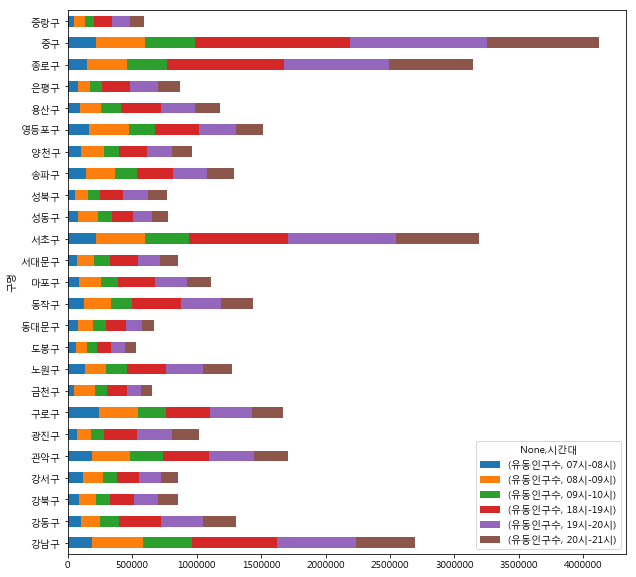

In [89]:
출퇴근시간대구별유동인구.plot(kind = 'barh', stacked = True, figsize = (10,10))

## 미션 4. 평일 유동인구와 주말 유동인구를 분석하여, 그 차이가 가장 많이 나는 상위 5개 구 정보를 출력


In [96]:
요일별구별유동인구 = 유동인구.pivot_table(index = '구명', columns = '조사요일', values = '유동인구수', aggfunc = 'sum')
요일별구별유동인구

조사요일,금,목,수,월,토,화
구명,,,,,,
강남구,1332957.0,457392.0,1263249.0,1203096.0,1041297.0,771612.0
강동구,667851.0,233298.0,638115.0,621825.0,684879.0,382038.0
강북구,383547.0,123090.0,375171.0,371385.0,390237.0,240585.0
강서구,371961.0,131874.0,359754.0,361914.0,343626.0,218241.0
관악구,774048.0,275886.0,750717.0,740619.0,677814.0,460836.0
광진구,442401.0,137526.0,426276.0,428118.0,465678.0,294864.0
구로구,689622.0,216120.0,687081.0,681717.0,669030.0,466620.0
금천구,268839.0,91344.0,272085.0,270630.0,172191.0,187053.0
노원구,651681.0,186870.0,625392.0,615462.0,631989.0,419322.0


In [99]:
요일별구별유동인구['주중'] = (요일별구별유동인구['월'] + 요일별구별유동인구['화'] + 
                         요일별구별유동인구['수']+요일별구별유동인구['목']+요일별구별유동인구['금'])/5

In [107]:
요일별구별유동인구['주말'] = 요일별구별유동인구['토']

In [108]:
요일별구별유동인구['주중주말편차'] = (요일별구별유동인구['주중']-요일별구별유동인구['주말']).abs()

In [110]:
요일별구별유동인구 = 요일별구별유동인구[['주중','주말', '주중주말편차']]

In [112]:
요일별구별유동인구.sort_values(by = '주중주말편차', ascending= False)

조사요일,주중,주말,주중주말편차
구명,,,
중구,1833919.8,2761104.0,927184.2
종로구,1270663.8,1871346.0,600682.2
서초구,1077611.4,1374945.0,297333.6
송파구,431248.2,609228.0,177979.8
강동구,508625.4,684879.0,176253.6
용산구,443713.2,605682.0,161968.8
노원구,499745.4,631989.0,132243.6
구로구,548232.0,669030.0,120798.0
광진구,345837.0,465678.0,119841.0


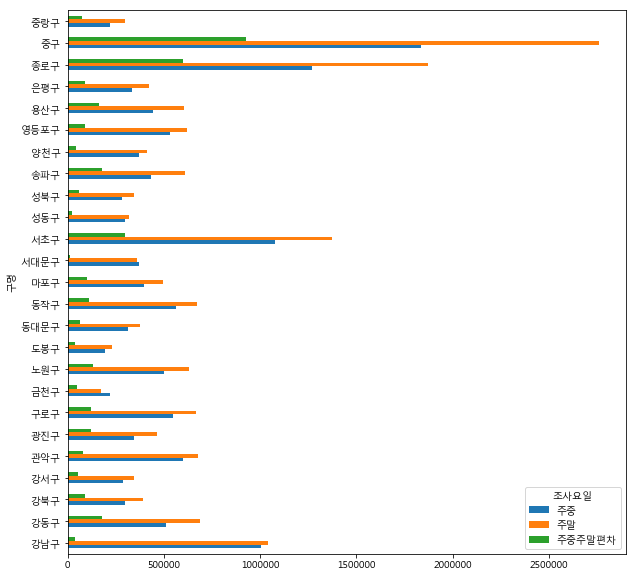

In [116]:
요일별구별유동인구.plot(kind = 'barh', figsize = (10,10))

## 미션 5. 유동인구의 수와 보행환경 정보를 분석하여, 보행 환경 개선이 시급한 곳 10군데를 선정. (보행환경 정보는 유동인구상세로그_2015.xlsx의 보행환경 컬럼 참고. 매우불만족(1), 약간불만족(2), 보통(3), 약간만족(4), 매우만족(5) )


In [117]:
유동인구_속성조사 = pd.read_excel('data/project data/기본 데이터/2_유동인구_속성조사_2015.xlsx', 
                      skiprows = [0,1,3])

In [121]:
def 보행환경(만족도):
    if 만족도 == '매우만족':
        return 5
    elif 만족도 == '약간만족':
        return 4
    elif 만족도 == '보통':
        return 3
    elif 만족도 == '약간불만족':
        return 2
    elif 만족도 == '매우불만족':
        return 1
    else:
        return 0

In [126]:
유동인구_속성조사['보행점수'] = 유동인구_속성조사.보행환경.apply(보행환경)

In [137]:
지점별유동인구 = 유동인구.pivot_table(index = '조사지점코드', values = '유동인구수', aggfunc = 'sum')

In [138]:
지점별보행점수 = 유동인구_속성조사.pivot_table(index = '조사지점코드', values = '보행점수', aggfunc = 'mean')

In [142]:
유동인구.head(1)

,ID유동인구조사,조사지점코드,조사구분,조사요일,시간대,유동인구수,년도,조사지점명,구코드,동코드,X좌표,Y좌표,집계구코드,구명,동명
0,3067,01-003,본조사,금,07시-08시,21.0,2015,신흥모피명품전문크리닝.,11010,1.10106e+06,196423.97707,455511.52968,1.101055e+12,종로구,부암동


In [146]:
지점별 = pd.concat([지점별유동인구, 지점별보행점수], axis = 1)
지점별

,유동인구수,보행점수
01-003,2895.0,3.90
01-004,13872.0,NaN
01-005,10509.0,2.35
01-008,5316.0,2.60
01-009,5637.0,3.05
01-016,62268.0,2.60
01-019,69288.0,2.50
01-020,333978.0,2.30
01-021,33354.0,NaN
01-028,99138.0,2.40


In [153]:
지점별 = 지점별.join(조사지점.set_index('조사지점코드')['조사지점명'])

In [155]:
지점별.sort_values(by = '보행점수')

,유동인구수,보행점수,조사지점명
15-120,16707.0,1.00,해성산부인과
06-115,3654.0,1.00,이화섬유건물입구
19-1191,6639.0,1.20,신풍동물병원 뒷편
01-2095,490074.0,1.20,동아일보
01-2095,490074.0,1.20,동아일보
23-285,333768.0,1.25,한신상호저축은행
19-121,4539.0,1.25,우체국
23-285,333768.0,1.25,한신상호저축은행
23-091,11763.0,1.25,미래에셋 생명
19-034,3657.0,1.30,(주)뉴훼밀리
